In [1]:
import pandas as pd

# Load data
df = pd.read_csv('../data/processed/combined_data.csv', parse_dates=['Date'])

In [2]:
# Filter Tesla data
tesla_df = df[df['Ticker'] == 'TSLA'][['Date', 'Close']]

# Ensure 'Date' is a datetime object (if not already)
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

# Set 'Date' as the index
tesla_df.set_index('Date', inplace=True)

# Resample to daily frequency and forward fill missing values
tesla_df = tesla_df.asfreq('D').ffill() 

# Display the first few rows of Tesla's data
print(tesla_df.head())

                              Close
Date                               
2015-01-02 00:00:00+00:00 -1.127493
2015-01-03 00:00:00+00:00 -1.127493
2015-01-04 00:00:00+00:00 -1.127493
2015-01-05 00:00:00+00:00 -1.131838
2015-01-06 00:00:00+00:00 -1.131277


ARIMA - MAE: 0.10, RMSE: 0.11, MAPE: 3.60%


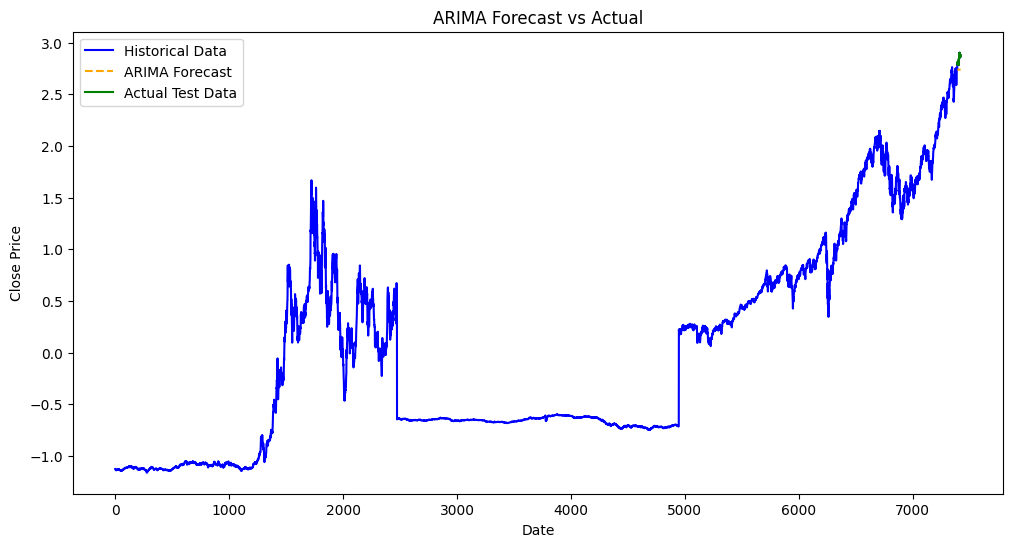

In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Define the ARIMA model and train-test split
def train_arima_model(df, order=(1, 1, 1), forecast_steps=30):
    """
    Trains an ARIMA model, evaluates it on the test data, and plots the forecast.
    
    Parameters:
    df (pd.DataFrame): The input data containing the 'Close' column.
    order (tuple): The (p, d, q) order of the ARIMA model.
    forecast_steps (int): Number of steps to forecast.
    
    Returns:
    dict: Dictionary containing MAE, RMSE, MAPE, and the forecasted values.
    """
    
    # Train-test split (last 'forecast_steps' points as test set)
    train = df['Close'][:-forecast_steps]
    test = df['Close'][-forecast_steps:]
    
    # Initialize and fit the ARIMA model
    arima_model = ARIMA(train, order=order)
    arima_fitted = arima_model.fit()

    # Forecast for the test set
    arima_forecast = arima_fitted.forecast(steps=forecast_steps)

    # Calculate evaluation metrics
    mae = mean_absolute_error(test, arima_forecast)
    rmse = np.sqrt(mean_squared_error(test, arima_forecast))
    mape = np.mean(np.abs((test - arima_forecast) / test)) * 100

    # Output metrics
    print(f'ARIMA - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%')

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Historical Data', color='blue')
    plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange', linestyle='--')
    plt.plot(test.index, test, label='Actual Test Data', color='green')
    plt.title('ARIMA Forecast vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Forecast': arima_forecast
    }

# Example usage with ARIMA order (1, 1, 1) and forecast for 30 days
results = train_arima_model(df, order=(1, 1, 1), forecast_steps=30)


SARIMA - MAE: 0.10, RMSE: 0.10, MAPE: 3.37%


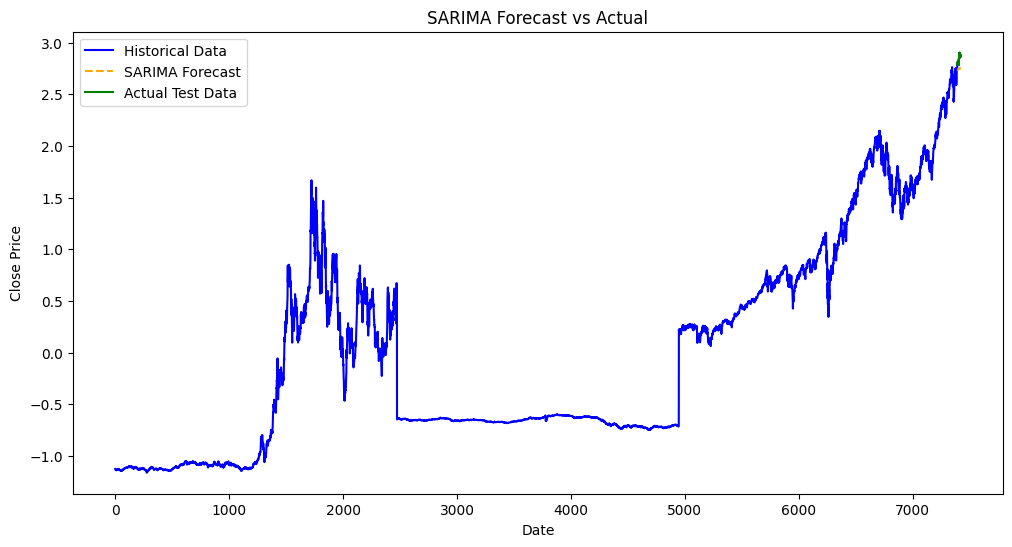

In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Define the SARIMA model and train-test split
def train_sarima_model(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), forecast_steps=30):
    """
    Trains a SARIMA model, evaluates it on the test data, and plots the forecast.
    
    Parameters:
    df (pd.DataFrame): The input data containing the 'Close' column.
    order (tuple): The (p, d, q) order of the SARIMA model.
    seasonal_order (tuple): The seasonal (P, D, Q, s) order for the SARIMA model.
    forecast_steps (int): Number of steps to forecast.
    
    Returns:
    dict: Dictionary containing MAE, RMSE, MAPE, and the forecasted values.
    """
    
    # Train-test split (last 'forecast_steps' points as test set)
    train = df['Close'][:-forecast_steps]
    test = df['Close'][-forecast_steps:]
    
    # Initialize and fit the SARIMA model
    sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    sarima_fitted = sarima_model.fit(disp=False)

    # Forecast for the test set
    sarima_forecast = sarima_fitted.forecast(steps=forecast_steps)

    # Calculate evaluation metrics
    mae = mean_absolute_error(test, sarima_forecast)
    rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
    mape = np.mean(np.abs((test - sarima_forecast) / test)) * 100

    # Output metrics
    print(f'SARIMA - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%')

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Historical Data', color='blue')
    plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='orange', linestyle='--')
    plt.plot(test.index, test, label='Actual Test Data', color='green')
    plt.title('SARIMA Forecast vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'Forecast': sarima_forecast
    }

# Example usage with SARIMA order (1, 1, 1) and seasonal order (1, 1, 1, 12), forecasting 30 days
results = train_sarima_model(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), forecast_steps=30)

Epoch 1/10


c:\Users\1221\Desktop\Acadamy AIM 2\GMF-Investments-TimeSeries-PortfolioOptimization\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0050
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 3.4030e-04
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 3.4705e-04
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 3.1591e-04
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.7525e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.6346e-04
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.1599e-04
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.4105e-04
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 2.1764e-04
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.8894e-04
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
LSTM - MAE: 0.06497830817671146, RMSE: 0.07978111638407537, MAPE: 4.152513253457709%


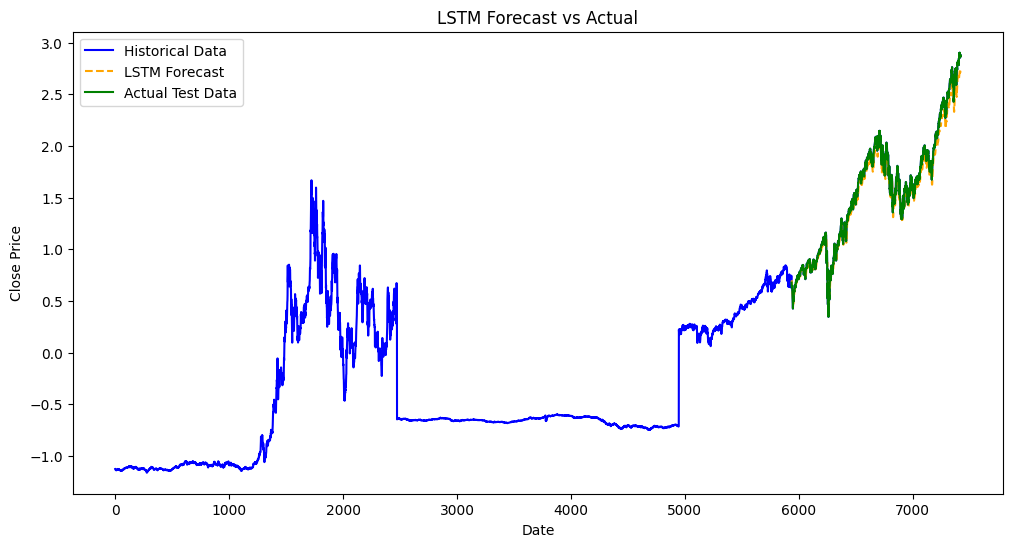

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = df[['Close']].values  # Using only the 'Close' prices for prediction

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define a function to create sequences of data for LSTM input
def create_sequences(data, seq_length=60):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

# Parameters
sequence_length = 60  # Look back 60 days
train_size = int(len(scaled_data) * 0.8)  # 80% train, 20% test

# Split into training and testing data
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - sequence_length:]  # Keep overlap for initial sequence

# Create sequences
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

# Reshape inputs to (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10)

# Forecast on the test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Undo scaling
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Undo scaling for comparison

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100

print(f'LSTM - MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Historical Data', color='blue')
plt.plot(df.index[train_size:], predictions, label='LSTM Forecast', color='orange', linestyle='--')
plt.plot(df.index[train_size:], y_test_actual, label='Actual Test Data', color='green')
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')


plt.legend()
plt.show()